# Titanic 데이터 분석

In [95]:
# 아래의 데이터를 사용
import seaborn as sns
import pandas as pd
import numpy as np
# seaborn 에서 데이터 로드를 위한 코드
titanic = sns.load_dataset('titanic')

# 데이터 정보 확인

In [96]:
# head()를 이용하여 어떤 형태의 데이터로 테이블이 이루어져 있는지 확인한다.

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### column description

- survived 생존 여부 : 0 = 사망, 1 = 생존
- pclass : 티켓의 선실 등급 : 1 = 일등석, 2 = 이등석, 3 = 삼등석
- sex : 탑승자 성별
- age : 탑승자 나이
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
- parch : 같이 탑승한 부모님 또는 어린이 인원수
- fare : 요금
- embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton
- class : 선실 등급
- who : 탑승자 성별
- deck: 데크
- embark_town: 탑승 항구
- alive: 생존여부
- alone: 혼자인지 여부

In [97]:
# info()를 이용하여 데이터 프레임의 기본 정보를 확인한다.

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [98]:
titanic.isnull().sum()

# deck에 결측치가 많으므로 오차가 날 확률이 높아 분석에서 제외한다.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [99]:
# age의 경우 생존율 분석에서 중요한 부분을 차지할 수 있으므로 결측값을 평균값으로 대체한다.

titanic['age'].fillna(titanic['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

# 생존율 분석 - survived와 다른 column의 상관관계 분석 

## 1. 티켓 등급별 생존율 분석 (pclass)
## 2. 같이 탑승한 부모님 또는 어린이 인원수에 따른 생존율 분석 (parch)
## 3. 나이에 따른 생존율 분석 (age)
## 4. 혼자인 남여의 생존율 분석 (alone, sex)
## 5. 선실등급과 나이에 따른 생존율 분석 (class, age) 

In [100]:
# 막대그래프를 보다 쉽게 사용하고 파악할 수 있게 함수화를 하였다.
# 기존의 0, 1이 아닌 survived와 dead로 하여 가독성을 좋게 하였다.
def bar_chart(feature) :
    survived = titanic[titanic['survived']==1][feature].value_counts()/891*100
    dead = titanic[titanic['survived']==0][feature].value_counts()/891*100
    df=pd.DataFrame([survived, dead])
    df.index = ['survived', 'dead']
    df.plot(kind='bar', rot=0)

## 1. 티켓 등급별 생존율 분석

티켓 등급별 생존율 분석을 위해 티켓 등급별 전체 승객에 대한 사망율을 알아보고 각 등급별 승객 수에 대한 생존 비율을 알아본다.

pclass에 따른 생존 비율을 알아보기 위해 count를 해준 후 전체 승객인 891로 나누어준 후 100을 곱하였다.

In [101]:
pclass_survived_percent = titanic.groupby(['pclass','survived'])['survived'].count()/891*100
pclass_survived_percent

pclass  survived
1       0            8.978676
        1           15.263749
2       0           10.886644
        1            9.764310
3       0           41.750842
        1           13.355780
Name: survived, dtype: float64

막대 그래프로 나타내면 다음과 같다.

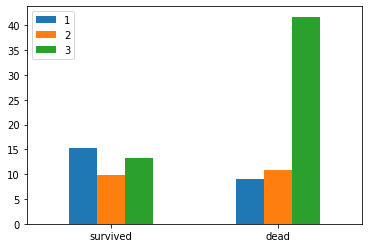

In [102]:
bar_chart('pclass')

티켓 등급이 3등급인 승객 중 사망한 사람이 전체의 약 42%로 가장 높은 수치를 기록했다.

In [103]:
# 1등급의 생존 비율 = 전체에 대한 1등급 생존율 / (전체에 대한 1등급 생존율 + 전체에 대한 1등급 사망율)
pclass_survived_percent[1][1] / (pclass_survived_percent[1][0] + pclass_survived_percent[1][1]) * 100

62.96296296296296

In [104]:
# 2등급의 생존 비율 = 전체에 대한 2등급 생존율 / (전체에 대한 2등급 생존율 + 전체에 대한 2등급 사망율)
pclass_survived_percent[2][1] / (pclass_survived_percent[2][0] + pclass_survived_percent[2][1]) * 100

47.28260869565217

In [105]:
# 3등급의 생존 비율 = 전체에 대한 3등급 생존율 / (전체에 대한 3등급 생존율 + 전체에 대한 3등급 사망율)
pclass_survived_percent[3][1] / (pclass_survived_percent[3][0] + pclass_survived_percent[3][1]) * 100

24.23625254582485

등급에 따른 생존율은 다음과 같다.
- 1등급 : 약 63.0%
- 2등급 : 약 47.3%
- 3등급 : 약 24.2%

## 즉, 티켓 등급이 높을수록 생존율이 높아진다는 것을 알 수 있다.

## 2. 같이 탑승한 부모님 또는 어린이 인원수에 따른 생존율 분석

먼저 전체 승객에 대해서 같이 탑승한 부모님 또는 어린이 인원수에 따른 생존, 사망 비율을 알아본다.

In [106]:
parch_survived_percent = titanic.groupby(['parch','survived'])['survived'].count()/891*100
parch_survived_percent

parch  survived
0      0           49.943883
       1           26.150393
1      0            5.948373
       1            7.295174
2      0            4.489338
       1            4.489338
3      0            0.224467
       1            0.336700
4      0            0.448934
5      0            0.448934
       1            0.112233
6      0            0.112233
Name: survived, dtype: float64

표로 볼 때, parch 수가 0인 비율이 전체에 대해 절반 이상임을 알 수 있다. 전체 인원에 대한 parch의 비율을 알아보자.

In [107]:
parch_percent = titanic.groupby(['parch'])['survived'].count()/891*100
parch_percent

parch
0    76.094276
1    13.243547
2     8.978676
3     0.561167
4     0.448934
5     0.561167
6     0.112233
Name: survived, dtype: float64

parch가 0인 비율이 전체의 76퍼센트임으로 parch에 대한 값을 boolean으로 나누는게 좋을 것 같다고 생각한다.

In [108]:
n = 0
for i in titanic['parch']:
    if i > 0:
        titanic['parch'][n] = True
    else:
        titanic['parch'][n] = False
    n = n+1

<ipython-input-108-4b2d5cd3f981>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['parch'][n] = False
C:\Users\SAMSUNG\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-108-4b2d5cd3f981>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['parch'][n] = True


In [109]:
titanic.groupby(['parch','survived'])['survived'].count()/891*100

parch  survived
False  0           49.943883
       1           26.150393
True   0           11.672278
       1           12.233446
Name: survived, dtype: float64

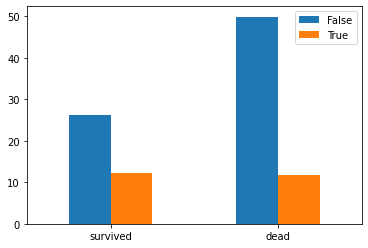

In [110]:
bar_chart('parch')

## 분석 결과 
- 전체 승객의 약 76.1%는 parch없이 온 승객이다.
- parch 수가 0인 승객은 전체 승객에 대해 사망 비율이 약 49.9%로 parch 수가 0의 생존 비율인 26.2%에 비해 약 1.9배 높은 사망율을 기록했다.
- parch 수가 True, 즉 1이상인 승객은 전체의 약 24%로 이들에 대한 사망율과 생존율은 거의 차이가 없다.

## 3. 나이에 따른 생존율 분석

먼저 전체 승객에 대해서 나이에 따른 생존, 사망 비율을 알아본다.

In [111]:
age_survived_percent = titanic.groupby(['age','survived'])['survived'].count()/891*100
age_survived_percent

age    survived
0.42   1           0.112233
0.67   1           0.112233
0.75   1           0.224467
0.83   1           0.224467
0.92   1           0.112233
                     ...   
70.00  0           0.224467
70.50  0           0.112233
71.00  0           0.224467
74.00  0           0.112233
80.00  1           0.112233
Name: survived, Length: 142, dtype: float64

나이가 소숫점 둘째 자리까지 나타나있고, 최소 0.42세 부터 최대 80세까지 다양하게 있다.
연령대 별로 분포를 알아보기 위해 10 단위로 끊어서 다시 나타내 본다.

In [112]:
n = 0
for i in titanic['age']:
    titanic['age'][n] = i - i%10
    n = n + 1

<ipython-input-112-8a94853c6788>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age'][n] = i - i%10


연령대별 전체 승객의 분포는 다음과 같다.

In [113]:
age_percent = titanic.groupby(['age'])['survived'].count()/891*100
age_percent

age
0.0      6.958474
10.0    11.447811
20.0    24.691358
30.0    18.742985
40.0     9.988777
50.0     5.387205
60.0     2.132435
70.0     0.673401
80.0     0.112233
Name: survived, dtype: float64

60, 70, 80대가 가장 적으므로 그 셋을 하나로 묶어 'elder'라고 칭한다.

In [114]:
n = 0
for i in titanic['age']:
    if i >= 60:
        titanic['age'][n] = 'elder'
    n = n + 1

<ipython-input-114-e1e9e6485742>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age'][n] = 'elder'
C:\Users\SAMSUNG\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [115]:
age_percent = titanic.groupby(['age'])['survived'].count()/891*100
age_percent

age
0.0       6.958474
10.0     11.447811
20.0     24.691358
30.0     18.742985
40.0      9.988777
50.0      5.387205
elder     2.918070
Name: survived, dtype: float64

<AxesSubplot:xlabel='age'>

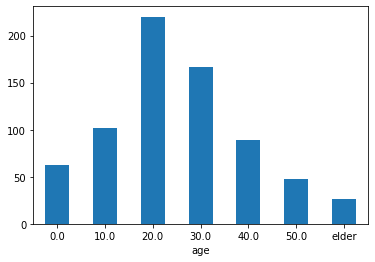

In [116]:
titanic.groupby(by=['age']).size().plot(kind='bar', rot=0)

전체 승객에 대한 연령대별 생존, 사망 비율은 다음과 같다.

In [117]:
age_survived_percent = titanic.groupby(['age','survived'])['survived'].count()/891*100
age_survived_percent

age    survived
0.0    0            2.693603
       1            4.264871
10.0   0            6.846240
       1            4.601571
20.0   0           16.049383
       1            8.641975
30.0   0           10.549944
       1            8.193042
40.0   0            6.172840
       1            3.815937
50.0   0            3.142536
       1            2.244669
elder  0            2.132435
       1            0.785634
Name: survived, dtype: float64

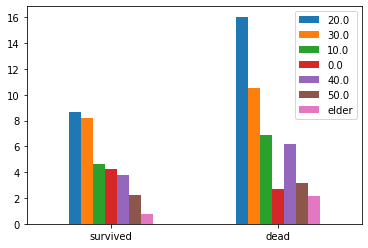

In [118]:
bar_chart('age')

두 그래프를 비교했을 때 특이한 점은 0-10살의 아이는 사망율 보다 생존율이 높다는 점이다.
연령대 별로 생존, 사망 비율은 다음과 같다.

In [119]:
# 0-10세 생존 비율 = 전체에 대한 0-10세의 생존율 / (전체에 대한 0-10세의 생존율 + 전체에 대한 0-10세의 사망율)
age_survived_percent[1] / (age_survived_percent[0] + age_survived_percent[1]) * 100

61.290322580645174

In [120]:
# 10대의 생존 비율 = 전체에 대한 10대의 생존율 / (전체에 대한 10대의 생존율 + 전체에 대한 10대의 사망율)
age_survived_percent[3] / (age_survived_percent[2] + age_survived_percent[3]) * 100

40.196078431372555

In [121]:
# 20대의 생존 비율 = 전체에 대한 20대의 생존율 / (전체에 대한 20대의 생존율 + 전체에 대한 20대의 사망율)
age_survived_percent[5] / (age_survived_percent[4] + age_survived_percent[5]) * 100

35.0

In [122]:
# 30대의 생존 비율 = 전체에 대한 30대의 생존율 / (전체에 대한 30대의 생존율 + 전체에 대한 30대의 사망율)
age_survived_percent[7] / (age_survived_percent[6] + age_survived_percent[7]) * 100

43.7125748502994

In [123]:
# 40대의 생존 비율 = 전체에 대한 40대의 생존율 / (전체에 대한 40대의 생존율 + 전체에 대한 40대의 사망율)
age_survived_percent[9] / (age_survived_percent[8] + age_survived_percent[9]) * 100

38.20224719101123

In [124]:
# 50대의 생존 비율 = 전체에 대한 50대의 생존율 / (전체에 대한 50대의 생존율 + 전체에 대한 50대의 사망율)
age_survived_percent[11] / (age_survived_percent[10] + age_survived_percent[11]) * 100

41.666666666666664

In [125]:
# 60대 이상(elder)의 생존 비율 = 전체에 대한 60대 이상의 생존율 / (전체에 대한 60대 이상의 생존율 + 전체에 대한 60대 이상의 사망율)
age_survived_percent[13] / (age_survived_percent[12] + age_survived_percent[13]) * 100

26.923076923076927

## 분석 결과
- 승객의 연령대는 20대가 가장 많고 그 다음은 30대이다.
- 0-10세의 아이의 생존율이 약 61.3%로 절반 이상이다. 이것을 통해 아이들을 먼저 구하고자 하는 승객들의 따듯한 마음이 전해진다.
- 60대 이상의 노인의 생존율이 약 26.9%로 가장 적은 수치를 보인다.
- 그 다음 낮은 수치가 20대의 생존율이다. 이것 역시 특이한 수치이다.

## 4. 혼자인 남여의 생존율 분석 (alone, sex)

우선 전체에 대해서 alone의 유무에 따른 생존율은 다음과 같다.

In [126]:
titanic.groupby(['alone','survived'])['survived'].count()/891*100

alone  survived
False  0           19.640853
       1           20.089787
True   0           41.975309
       1           18.294052
Name: survived, dtype: float64

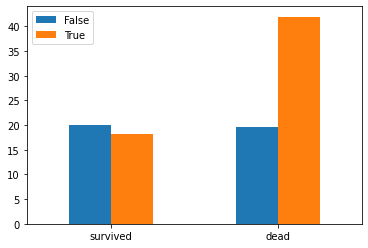

In [127]:
bar_chart('alone')

혼자일 때 사망율이 생존율보다 두 배 이상 높다. 하지만, 혼자가 아닐 때는 차이가 많지 않다.

그렇다면 전체에 대해서 alone의 유무와 성별에 따른 생존율은 다음과 같다.

In [128]:
alone_sex_survived_percent = titanic.groupby(['alone','sex','survived'])['survived'].count()/891*100
alone_sex_survived_percent

alone  sex     survived
False  female  0            6.060606
               1           15.039282
       male    0           13.580247
               1            5.050505
True   female  0            3.030303
               1           11.111111
       male    0           38.945006
               1            7.182941
Name: survived, dtype: float64

<AxesSubplot:xlabel='alone,sex'>

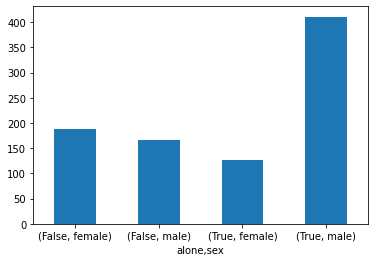

In [129]:
titanic.groupby(by=['alone','sex']).size().plot(kind='bar', rot=0)

성별로 다시 나누니 다음과 같은 특징이 나타난다.

- alone이 아닌 여성의 경우 생존율이 사망율에 비해 두 배 이상이다.
- alone이 아닌 남성의 경우 사망율이 생존율에 비해 두 배 이상이다.
- alone인 여성의 경우는 생존율이 사망율에 비해 세 배 이상이다.
- alone인 남성의 경우는 사망율이 생존율에 비해 다섯 배 이상이다.

이것을 각각의 비율로 나타내면 다음과 같다.

In [130]:
# not alone 여성의 생존율 = 전체에 대한 not alone 여성의 생존율 / (전체에 대한 not alone 여성의 생존율 + 전체에 대한 not alone 여성의 사망율)
alone_sex_survived_percent[0][1] / (alone_sex_survived_percent[0][1] + alone_sex_survived_percent[0][0])

0.7127659574468085

In [131]:
# not alone 남성의 생존율 = 전체에 대한 not alone 남성의 생존율 / (전체에 대한 not alone 남성의 생존율 + 전체에 대한 not alone 남성의 사망율)
alone_sex_survived_percent[0][3] / (alone_sex_survived_percent[0][3] + alone_sex_survived_percent[0][2])

0.2710843373493976

In [132]:
# alone 여성의 생존율 = 전체에 대한 alone 여성의 생존율 / (전체에 대한 alone 여성의 생존율 + 전체에 대한 alone 여성의 사망율)
alone_sex_survived_percent[1][1] / (alone_sex_survived_percent[1][1] + alone_sex_survived_percent[1][0])

0.7857142857142857

In [133]:
# alone 남성의 생존율 = 전체에 대한 alone 남성의 생존율 / (전체에 대한 alone 남성의 생존율 + 전체에 대한 alone 남성의 사망율)
alone_sex_survived_percent[1][3] / (alone_sex_survived_percent[1][3] + alone_sex_survived_percent[1][2])

0.15571776155717762

여성의 경우 alone의 여부와 상관없이 항상 71% 이상의 높은 생존율을 보인다.

하지만 남성의 경우 28% 이하의 생존율을 보이는데, alone일 경우가 약 15.6%로 상당히 낮은 생존율을 보인다.

## 분석 결과

- 전체 승객에 대하여 not alone인 경우 생존율과 사망율이 거의 비슷하다.
- not alone인 승객에 대하여 여성의 생존율은 약 71.3% 이지만, 남성의 생존율은 약 27.1%이다.
- 전체 승객에 대하여 alone인 경우 사망율이 생존율보다 두 배 이상 높다.
- alone인 승객에 대하여 여성의 생존율은 약 78.6% 이지만, 남성의 생존율은 약 15.6%이다.
- 즉, 여성의 경우 alone과 not alone에 크게 상관 없이 생존율이 높지만, 남성의 경우 둘 다 생존율이 낮지만, alone의 경우 크게 낮은 생존율을 보인다.

## 5. 선실등급과 나이에 따른 생존율 분석

우선, 선실등급이 위에서 분석했던 티켓 등급인 pclass와 전부 같은 수치인지 비교를 해본다.

In [134]:
n=0
for i in titanic['pclass']:
    if (i==1) & (titanic['class'][n]=='First'):
        n=n+1
    elif (i==2) & (titanic['class'][n]=='Second'):
        n=n+1
    elif (i==3) & (titanic['class'][n]=='Third'):
        n=n+1
    
if n==891:
    print("pclass == class")

pclass == class


pclass와 class가 같으므로 위에서 분석했던 pclass와 age를 통해 분석 가능하다.

우리는 위의 분석을 통해 알 수 있는 분석 결과는 다음과 같다.
- class가 높을수록 생존율이 높다.
- 0-10세가 생존율이 가장 높다 
- elder가 생존율이 가장 낮다.

그렇다면 class별 나이 분포도를 분석하고 둘의 상관 관계를 파악해본다.

class별 나이 분포도를 분석하면 다음과 같다.

In [135]:
titanic.groupby(['age','class'])['survived'].count()/891*100

age    class 
0.0    First      0.336700
       Second     1.907969
       Third      4.713805
10.0   First      2.020202
       Second     2.020202
       Third      7.407407
20.0   First      3.815937
       Second     5.948373
       Third     14.927048
30.0   First      5.611672
       Second     5.387205
       Third      7.744108
40.0   First      4.152637
       Second     2.020202
       Third      3.815937
50.0   First      3.030303
       Second     1.683502
       Third      0.673401
elder  First      1.907969
       Second     0.448934
       Third      0.561167
Name: survived, dtype: float64

<AxesSubplot:xlabel='class,age'>

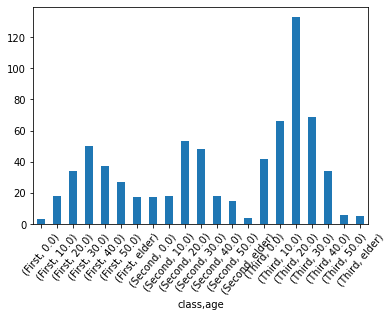

In [136]:
titanic.groupby(by=['class','age']).size().plot(kind='bar', rot=50)

위의 자료들을 통해 알 수 있는 것은 다음과 같다.
- 생존율이 가장 높았던 0-10세는 생존율이 가장 낮은 Third class에 가장 많은 비율로 분포되어 있다.
- 생존율이 가장 낮았던 elder는 생존율이 가장 높은 First class에 가장 많은 비율로 분포되어 있다.


class와 age에 대한 생존율 데이터는 다음과 같다.

In [137]:
class_age_survived_percent = titanic.groupby(['class','age','survived'])['survived'].count()/891*100
class_age_survived_percent

class   age    survived
First   0.0    0            0.112233
               1            0.224467
        10.0   0            0.336700
               1            1.683502
        20.0   0            1.122334
               1            2.693603
        30.0   0            1.234568
               1            4.377104
        40.0   0            1.683502
               1            2.469136
        50.0   0            1.346801
               1            1.683502
        elder  0            1.346801
               1            0.561167
Second  0.0    0            0.000000
               1            1.907969
        10.0   0            1.010101
               1            1.010101
        20.0   0            3.479237
               1            2.469136
        30.0   0            3.254770
               1            2.132435
        40.0   0            0.897868
               1            1.122334
        50.0   0            1.122334
               1            0.561167
        elder 

위의 데이터를 통해 다음과 같은 사실들을 알 수 있다.
- 0-10세는 First class와 Second class에서 높은 생존율을 보인다. 하지만 Third class에서는 사망율이 0.4% 더 높다.
- elder는 class에 상관없이 사망율이 생존율에 비해 두 배에서 세 배 높다.
- First class에서 elder를 제외한 전 연령층은 생존율이 사망율 보다 높다.
- Third class에서는 전 연령층은 사망율이 생존율 보다 높다.